<a href="https://colab.research.google.com/github/AmonKi/Telecommunication-Industry-Week1-Challenge/blob/Task-1/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Cleaning and exploration**

In [1]:
# importating the necessary libraries
import pandas as pd
import numpy as np

In [2]:
import io
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_excel('Week1_challenge_data_source.xlsx', na_values=['?', None])
db.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,13114483499779198976,2019-04-12 21:37:31,439.0,2019-04-25 08:08:09,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,NaN,NaN,70.0,54.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,22639.0,22700.0,1.074638e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,112.0,118.0,3148833.0,51181.0,10351530.0,2582603.0,1980032.0,922378.0,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,13114483501243799552,2019-04-13 08:41:59,612.0,2019-04-25 08:16:21,168.0,1035261.0,2.082014e+14,3.366537e+1

In [3]:
print(db.shape)

(150001, 55)


Identifying the different types of handsets


In [4]:
df = db.groupby('Handset Type').sum()

Sorting the values


In [5]:
df.sort_values(by=['Avg Bearer TP DL (kbps)'], ascending = False)

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Handset Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Huawei B528S-23A,9840851.0,9850688.0,1.837465e+09,4.112398e+18,6.644952e+14,1.706117e+18,2211191.0,773502.0,720826232.0,112684240.0,1.025710e+12,3.309499e+10,1572781.0,125868.0,109100.0,131268.0,1852476.0,46298.0,12142.0,6488.0,6.396486e+12,1.659397e+11,1.905659e+11,1.387507e+11,1.837479e+12,41955527.0,13799216.0,33803947.0,2381052.0,37433713.0,4241461.0,353495946.0,371033360.0,3.548481e+10,645213447.0,1.137063e+11,4.071805e+10,3.526562e+10,9.271574e+09,2.302879e+11,2.177800e+11,2.289451e+11,2.168110e+11,8.336540e+12,1.643919e+11,8.399672e+12,1.637918e+11,8.134095e+11,8.980229e+12
undefined,4497758.0,4451665.0,1.142560e+09,1.871111e+18,3.007511e+14,4.459986e+17,461891.0,93461.0,82553695.0,7861038.0,8.392857e+09,3.041340e+08,855881.0,20556.0,8058.0,6034.0,886898.0,4558.0,520.0,152.0,3.360721e+10,2.477897e+09,3.996017e+09,3.580968e+09,1.142565e+12,469339.0,300972.0,560580.0,10547.0,1212254.0,31984.0,9732647.0,11567890.0,1.608732e+10,296570573.0,5.179601e+10,1.840272e+10,1.613739e+10,4.241620e+09,1.047658e+11,9.877307e+10,1.041271e+11,9.945847e+10,3.836476e+12,7.457355e+10,3.755777e+12,7.405813e+10,3.698041e+11,4.129390e+12
Apple iPhone 7 (A1778),3117385.0,3180491.0,5.761693e+08,1.317083e+18,2.122755e+14,2.246602e+17,657275.0,42560.0,68206317.0,8977086.0,8.181467e+09,2.028909e+08,595981.0,16424.0,8063.0,6036.0,625504.0,3316.0,565.0,330.0,5.069151e+10,1.261788e+09,3.079919e+09,2.675035e+09,5.761726e+11,375421.0,202340.0,469623.0,19458.0,868664.0,33443.0,6315122.0,7972818.0,1.130887e+10,210941441.0,3.609002e+10,1.294254e+10,1.135107e+10,3.017030e+09,7.417889e+10,6.987621e+10,7.397125e+10,6.971820e+10,2.671933e+12,5.257548e+10,2.673685e+12,5.237467e+10,2.607151e+11,2.878833e+12
Apple iPhone 6S (A1688),4725770.0,4691062.0,9.957849e+08,1.961050e+18,3.169618e+14,3.352734e+17,675875.0,50339.0,65169580.0,9128651.0,1.135529e+10,3.552072e+08,905120.0,17404.0,8387.0,5980.0,933775.0,3805.0,507.0,332.0,4.892593e+10,1.485802e+09,3.041993e+09,2.767316e+09,9.957897e+11,315070.0,237730.0,438934.0,14174.0,810920.0,32545.0,6280897.0,7818457.0,1.696298e+10,311535665.0,5.429066e+10,1.930353e+10,1.678816e+10,4.362382e+09,1.111184e+11,1.049494e+11,1.099184e+11,1.036880e+11,3.985348e+12,7.758516e+10,3.907977e+12,7.771909e+10,3.879190e+11,4.294427e+12
Apple iPhone 6 (A1586),4475179.0,4501714.0,8.444304e+08,1.878602e+18,3.034525e+14,3.211825e+17,857872.0,49107.0,59387996.0,9347012.0,1.072474e+10,4.078480e+08,860044.0,20747.0,9749.0,6301.0,893617.0,3600.0,621.0,384.0,5.124696e+10,1.547359e+09,3.487569e+09,3.098977e+09,8.444351e+11,328704.0,205388.0,528499.0,16786.0,1023344.0,36207.0,7404001.0,9194445.0,1.638650e+10,295959651.0,5.255312e+10,1.842295e+10,1.614865e+10,4.218105e+09,1.051887e+11,9.937554e+10,1.044968e+11,9.976586e+10,3.815764e+12,7.440109e+10,3.815926e+12,7.463390e+10,3.711134e+11,4.110537e+12
...,...,...,...,...,...,...,...,...,...,...,...,

In [6]:
df.columns.tolist()

['Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Em

In [7]:
counts = db['Handset Type'].value_counts()
counts.head(20)

Huawei B528S-23A                     19752
Apple iPhone 6S (A1688)               9419
Apple iPhone 6 (A1586)                9023
undefined                             8987
Apple iPhone 7 (A1778)                6326
Apple iPhone Se (A1723)               5187
Apple iPhone 8 (A1905)                4993
Apple iPhone Xr (A2105)               4568
Samsung Galaxy S8 (Sm-G950F)          4520
Apple iPhone X (A1901)                3813
Samsung Galaxy A5 Sm-A520F            3724
Samsung Galaxy J5 (Sm-J530)           3696
Samsung Galaxy J3 (Sm-J330)           3484
Samsung Galaxy S7 (Sm-G930X)          3199
Apple iPhone 8 Plus (A1897)           3016
Samsung Galaxy A8 (2018)              2592
Apple iPhone 6S Plus (A1687)          2179
Huawei E5180                          2079
Huawei P20 Lite Huawei Nova 3E        2021
Samsung Galaxy S7 Edge (Sm-G935X)     1965
Name: Handset Type, dtype: int64

In [8]:
print(counts.shape)

(1396,)


In [9]:
manufacturer = db['Handset Manufacturer'].value_counts()
manufacturer.head(10)

Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64

In [10]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The User Analytics in Telecommunication Industry dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The User Analytics in Telecommunication Industry dataset contains 12.49 % missing values.


In [11]:
# columns with missing values
db.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [12]:
# dropping columns with 30% missing values
df_clean = db.drop (['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis = 1)
df_clean.shape

(150001, 45)

In [15]:
df_clean.skew(axis = 0, skipna = True)

Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity Duration UL (ms)           7.382557
Dur. (ms).1                         3.952609
Nb of sec with Vol DL < 6250B       9.042166
Nb of sec 

In [39]:
# filling missing values in the respective columns with ffill method

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['Total UL (Bytes)'] = fix_missing_ffill(df_clean, 'Total UL (Bytes)')
df_clean['Total DL (Bytes)'] = fix_missing_ffill(df_clean, 'Total DL (Bytes)')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')
df_clean['Start ms'] = fix_missing_ffill(df_clean, 'Start ms')
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['End ms'] = fix_missing_ffill(df_clean, 'End ms')
df_clean['Dur. (ms)'] = fix_missing_ffill(df_clean, 'Dur. (ms)')
df_clean['IMSI'] = fix_missing_ffill(df_clean, 'IMSI')
df_clean['MSISDN/Number'] = fix_missing_ffill(df_clean, 'MSISDN/Number')
df_clean['IMEI'] = fix_missing_ffill(df_clean, 'IMEI')
df_clean['Last Location Name'] = fix_missing_ffill(df_clean, 'Last Location Name')
df_clean['Avg RTT DL (ms)'] = fix_missing_ffill(df_clean, 'Avg RTT DL (ms)')
df_clean['Avg RTT UL (ms)'] = fix_missing_ffill(df_clean, 'Avg RTT UL (ms)')
df_clean['Avg Bearer TP DL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP DL (kbps)')
df_clean['Avg Bearer TP UL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP UL (kbps)')
df_clean['DL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fix_missing_ffill(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['DL TP > 1 Mbps (%)'] = fix_missing_ffill(df_clean, 'DL TP > 1 Mbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['Activity Duration DL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration DL (ms)')
df_clean['Activity Duration UL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration UL (ms)')
df_clean['Dur. (ms).1'] = fix_missing_ffill(df_clean, 'Dur. (ms).1')
df_clean['Handset Manufacturer'] = fix_missing_ffill(df_clean, 'Handset Manufacturer')
df_clean['Handset Type'] = fix_missing_ffill(df_clean, 'Handset Type')
df_clean['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol UL < 1250B')



In [40]:
# cheking whether there are still missing values
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

**Transforming Data:**
 Scaling and Normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
244,84.657677
493,443.676222
353,588.780417
1726,133.137917
870,17.121546


In [42]:
original_data[0].min(), original_data[0].max()

(0.032024423341460946, 1833.175693601319)

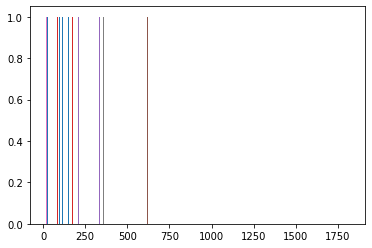

In [47]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

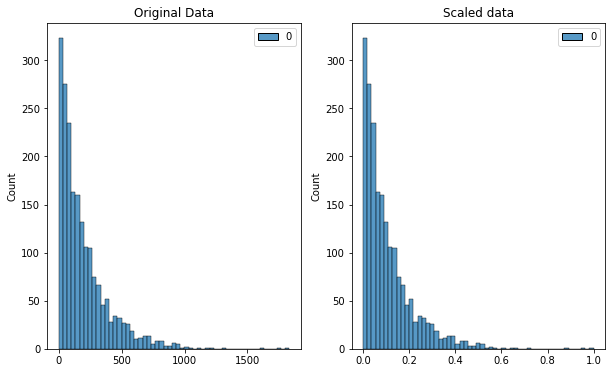

In [49]:
# mix-max scale the data between 0 and 1
import seaborn as sns
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

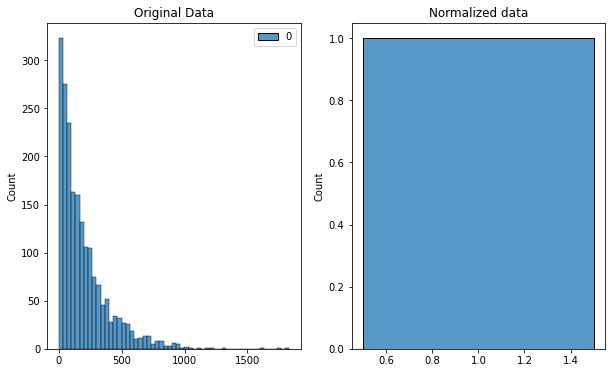

In [50]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [51]:
# checking the datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            150001 non-null  float64       
 7   MSISDN/Number                   150001 non-null  float64       
 8   IMEI                            150001 non-null  float64       
 9   Last Location Name              150001 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64